## Py-imp is the section of the project that is implemented using Python
This notebook is the feature selection section in a 4-phases

In [1]:
# Warning options (before all imports)
import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=FutureWarning)
# %xmode Verbose # simplified traceback when an exception occurs
%xmode Plain

Exception reporting mode: Plain


### Install needed packages


In [2]:
# Install a conda package in the current Jupyter kernel
import sys
# !mamba install -c conda-forge --yes --prefix {sys.prefix} <pkg>
# !conda install -c conda-forge --yes --prefix {sys.prefix} <pkg>

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} - m pip install <pkg>

In [3]:
# 'sklearn for Time series data'
# !mamba install -c conda-forge --yes --prefix {sys.prefix} sktime-all-extras
# 'for Time series data'
# !mamba install -c conda-forge --yes --prefix {sys.prefix} feature_engine
# !mamba install -c conda-forge --yes --prefix {sys.prefix} mlxtend
# !mamba install -c conda-forge --yes --prefix {sys.prefix} statsmodels
# !mamba install -c conda-forge --yes --prefix {sys.prefix} ptitprince
# for tf.keras.utils.plot_model
# !mamba install -c conda-forge --yes --prefix {sys.prefix} graphviz python-graphviz

# # upgrade pip
# !{sys.executable} -m pip install --upgrade pip

# # Debug pip
# # Uninstall SetupTools:
# !{sys.executable} -m pip uninstall pip setuptools
# # Reinstall Setuptools:
# !{sys.executable} -m pip install --upgrade setuptools

# feature engineering Time series data
# !{sys.executable} -m pip install tsfresh
# pretty Matplotlib plots
# !{sys.executable} -m pip install git+https://github.com/iammelvink/LovelyPlots
# better progress bar
# !{sys.executable} -m pip install rich
# better 'describe'
# !{sys.executable} -m pip install skimpy
# For size encoded heatmaps
# !{sys.executable} -m pip install heatmapz
# XGBoost
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost
# !{sys.executable} -m pip install fastprogress
# !{sys.executable} -m pip install matplotx[all]
# !{sys.executable} -m pip install matplotx
# !{sys.executable} -m pip install lux
# !jupyter nbextension install --py luxwidget
# !jupyter nbextension enable --py luxwidget

# !{sys.executable} -m pip install sweetviz
# !{sys.executable} -m pip install yellowbrick
# !{sys.executable} -m pip install autoviz
# !{sys.executable} -m pip install pandas-profiling
# !{sys.executable} -m pip install dtale
# !{sys.executable} -m pip install sketch
# !{sys.executable} -m pip install watermark
# !{sys.executable} -m pip install snoop
# for tf.keras.utils.plot_model
# !{sys.executable} -m pip install pydot
# for optimising hyperparameters
# !{sys.executable} -m pip install optuna
# to save models to files
# !{sys.executable} -m pip install h5py
# for creating visualisations of model architectures
# !{sys.executable} -m pip install git+https://github.com/paulgavrikov/visualkeras
# !{sys.executable} -m pip install git+https://github.com/RedaOps/ann-visualizer
# !{sys.executable} -m pip install visualkeras

# for feature selection
# !{sys.executable} -m pip install Boruta
# for feature selection BorutaShap
# !{sys.executable} -m pip install git+https://github.com/Ekeany/Boruta-Shap
# !{sys.executable} -m pip install BorutaShap
# for feature selection using SHAP
# !{sys.executable} -m pip install shap-hypetune

# !{sys.executable} -m pip install matplotlib pandas==1.5.3 --force-reinstall

In [4]:
# %pip install <pkg> --user

### Importing libraries


In [5]:
import snoop

snoop.install()
%load_ext snoop
# eg. put this before debug code %%snoop

from skimpy import skim  # better describe
from rich.progress import track
import os, random
from io import BytesIO
import timeit

import math
from scipy.stats import chi2_contingency

# Dataset reducer
# Source: https://www.kaggle.com/code/joseguzman/reducing/notebook
from reducing import PandaReducer

# Local ChatGPT-ish
import sketch
os.environ["SKETCH_MAX_COLUMNS"] = "300"
os.environ["SKETCH_ROW_OVERRIDE_LIMIT"] = "5"

# Run locally
# os.environ["LAMBDAPROMPT_BACKEND"] = "StarCoder"
# os.environ["SKETCH_USE_REMOTE_LAMBDAPROMPT"] = "False"
# os.environ["HF_ACCESS_TOKEN"] = "your_hugging_face_token"

# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cycler
from matplotlib import rcParams
# matplotlib extensions
import matplotx
# For better distribution plots
# import ptitprince as pt
# For size encoded heatmaps
from heatmap import *

# Pre-processing
from sklearn.preprocessing import *
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import *
from mlxtend.evaluate.time_series import *
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
from sklearn.compose import *
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import *
import itertools
from sklearn.feature_selection import *
from BorutaShap import BorutaShap

# Modeling
import tensorflow as tf
from tensorflow.keras.utils import *
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import *
from sklearn.model_selection import *
from sktime.utils.plotting import plot_series
from sklearn.utils import *
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.svm import *
from xgboost import *
from lightgbm import *
from catboost import *
from sklearn.utils.class_weight import *
from sklearn.exceptions import NotFittedError

# To save models to files
# import pickle
import joblib # for saving models to .pkl or.sav files, for scikit-learn models
import h5py # for saving models to .hdf5 files, for TensorFlow models
from tensorflow.keras.models import *
# saved_model = load_model('model_name.hdf5')

# for optimising hyperparameters
import optuna
# to visualise of model architectures
# import visualkeras
# from ann_visualizer.visualize import ann_viz;

np.set_printoptions(linewidth=140)

# Pandas options
# pd.options.display.precision = 3
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250
pd.options.mode.chained_assignment=None

pd.set_option('display.width', 140)

# Display Pipelines and models
from sklearn import set_config
set_config(display='diagram')

plt.style.reload_library()
# plt.style.use(matplotx.styles.dufte)
# plt.style.use('ipynb') # prettier plots
plt.style.use(['ipynb', 'colors10-markers'])
# Always put after custom styles
rcParams['axes.spines.top'] = False # remove top border of plot
rcParams['axes.spines.bottom'] = True # keep top border of plot
rcParams['axes.spines.left'] = True # keep top border of plot
rcParams['axes.spines.right'] = True # keep top border of plot
# rcParams['axes.grid' ] = True
rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset figsize

# To display charts in Jupyter
%matplotlib inline

# Matplotlib options
rcParams['figure.dpi'] = 600
# rcParams['figure.figsize'] = 8, 6
rcParams['legend.fontsize'] = "large"
rcParams['xtick.major.size'] = 4
rcParams['xtick.minor.size'] = 1
rcParams["figure.autolayout"] = True

# For reproducibility
# rng = np.random.RandomState(0)
rng = 777
os.environ['PYTHONHASHSEED'] = str(rng)
random.seed(rng)
np.random.seed(rng)
tf.random.set_seed(rng)

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(rng)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
# tf.config.experimental.enable_op_determinism()
os.environ['TF_DETERMINISTIC_OPS'] = "True"
os.environ["TF_DISABLE_SEGMENT_REDUCTION_OP_DETERMINISM_EXCEPTIONS"] = "True"

In [6]:
%load_ext watermark
# %watermark
%watermark --iversions

pandas    : 1.5.3
seaborn   : 0.11.0
scipy     : 1.10.1
xgboost   : 2.0.0
matplotlib: 3.7.1
keras     : 2.10.0
optuna    : 3.3.0
sketch    : 0.4.2
sys       : 3.8.17 | packaged by conda-forge | (default, Jun 16 2023, 07:01:59) [MSC v.1929 64 bit (AMD64)]
numpy     : 1.23.5
tensorflow: 2.10.1
matplotx  : 0.3.10
h5py      : 3.9.0
sklearn   : 1.3.1
joblib    : 1.3.2



In [7]:
# Helper functions for categorical type casting
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()]
            for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels',
                                    'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def return_categoricals(df, threshold=5):
    """
        Returns a list of columns that have less than or equal to
        `threshold` number of unique categorical levels
    """
    return list(filter(lambda c: c if len(df[c].unique()) <= threshold else None,
                       df.columns))

# def return_categoricals(df, threshold=5):
#     # create an empty list to store the categorical columns
#     categorical_columns = []
#     # loop through each column in the dataframe
#     for c in df.columns:
#         # try to convert the column values to numbers
#         try:
#             pd.to_numeric(df[c])
#             # if no error occurs, skip the column
#             pass
#         # if an error occurs, check the number of unique values
#         except:
#             if len(df[c].unique()) <= threshold:
#                 # if the number of unique values is less than or equal to the threshold, append the column name to the list
#                 categorical_columns.append(c)
#     # return the list of categorical columns
#     return categorical_columns

def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [8]:
# allow memory growth of GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

<a id="import-and-clean-data"></a>
## 1.   Import and Clean Data

In [9]:
data_path = "../../data/d_pump_cleaned/"

df_pdm_pump = PandaReducer().reduce(
    pd.read_csv(f"{data_path}/final_pdm_pump_cleaned.csv", parse_dates=["datetime"]))

# # Changing format's of date-time columns. Sort based on date for better readability
tables = [df_pdm_pump]
for dataset in tables:
    dataset.sort_values(["datetime"],
    inplace=True, ignore_index=True)

Dataset reduced 51.36% : 354.02 to 172.21 MB in 3.69 seconds


In [10]:
to_cast = return_categoricals(df_pdm_pump, threshold=5)
df_pdm_pump = to_categorical(to_cast, df_pdm_pump)
df_pdm_pump.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218880 entries, 0 to 218879
Data columns (total 212 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    datetime                  datetime64[ns]
 1    sensor_00                 float32       
 2    sensor_01                 float32       
 3    sensor_02                 float32       
 4    sensor_03                 float32       
 5    sensor_04                 float32       
 6    sensor_05                 float32       
 7    sensor_06                 float32       
 8    sensor_07                 float32       
 9    sensor_08                 float32       
 10   sensor_09                 float32       
 11   sensor_10                 float32       
 12   sensor_11                 float32       
 13   sensor_12                 float32       
 14   sensor_13                 float32       
 15   sensor_14                 float32       
 16   sensor_16                 float32   

In [11]:
print(f"Summary for DataFrame: df_pdm_pump")
summarize_categoricals(df_pdm_pump, show_levels=True)

Summary for DataFrame: df_pdm_pump


,Levels,No. of Levels,No. of Missing Values
datetime,"[2018-04-02T00:00:00.000000000, 2018-04-02T00:...",218880,0
sensor_00,"[2.459491, 2.449653, 2.46441, 2.444734, 2.4407...",1245,0
sensor_01,"[45.83333, 45.74652, 45.61632, 45.65972, 45.78...",698,0
sensor_02,"[52.34375, 52.30035, 52.38715, 52.343746, 52.4...",686,0
sensor_03,"[44.791664, 44.79166, 44.87847, 44.92188, 44.9...",492,0
sensor_04,"[639.5833, 634.838, 632.1759, 638.3102, 633.91...",7065,0
sensor_05,"[78.57581, 79.06493, 80.07732, 77.702, 80.2491...",189490,0
sensor_06,"[13.09317, 13.12211, 13.057, 13.14381, 13.2306...",809,0
sensor_07,"[16.16753, 16.13136, 16.21094, 16.12413, 16.16...",526,0
sensor_08,"[15.49479, 15.56713, 15.81308, 15.65393, 15.69...",620,0


Descriptive statistics for df_pdm_pump data

In [12]:
print("Total number of df_pdm_pump records: %d" % len(df_pdm_pump.index))
print(df_pdm_pump.head(3))
# skim(df_pdm_pump)
df_pdm_pump.describe().T.style.background_gradient(axis=0, cmap='YlOrRd')

Total number of df_pdm_pump records: 218880
             datetime  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0 2018-04-02 00:00:00   2.459491  45.833328   52.34375  44.791664  639.583313  78.575813   13.09317  16.167530   15.49479   15.11863   
1 2018-04-02 00:01:00   2.459491  45.833328   52.34375  44.791664  639.583313  78.575813   13.09317  16.167530   15.49479   15.11863   
2 2018-04-02 00:02:00   2.449653  45.746521   52.30035  44.791664  634.838013  79.064934   13.12211  16.131359   15.56713   15.11863   

   sensor_10  sensor_11  sensor_12  sensor_13   sensor_14   sensor_16   sensor_17  sensor_18   sensor_19   sensor_20   sensor_21  \
0  39.106178  48.769089  34.889641   1.630659  419.414490  462.781006  458.733002   2.510471  664.629211  399.444794  880.046570   
1  39.106178  48.769089  34.889641   1.630659  419.414490  462.781006  458.733002   2.510471  664.629211  399.444794  880.046570   
2  39.541698  4

,count,mean,std,min,25%,50%,75%,max
sensor_00,218880.000000,2.280020,0.587167,0.000000,2.416204,2.455556,2.499826,2.549016
sensor_01,218880.000000,47.599087,3.312211,0.000000,46.310760,48.133678,49.479160,56.727428
sensor_02,218880.000000,50.855911,3.676656,33.159721,50.390621,51.649300,52.777771,56.032990
sensor_03,218880.000000,43.742325,2.423205,31.640619,42.838539,44.227428,45.225693,48.220490
sensor_04,218880.000000,590.377991,144.470993,2.798032,626.620361,632.638916,637.615723,800.000000
sensor_05,218880.000000,73.387497,17.356197,0.000000,69.939972,75.596478,80.947273,99.999878
sensor_06,218880.000000,13.208711,2.911418,0.014468,13.324650,13.642940,14.539930,22.251160
sensor_07,218880.000000,15.493954,3.162599,0.000000,15.856480,16.167530,16.427950,23.596640
sensor_08,218880.000000,14.867301,2.965941,0.028935,15.147570,15.451390,15.697340,24.348961
sensor_09,218880.000000,14.487881,2.965429,0.000000,15.010130,15.082470,15.118630,25.000000


In [13]:
# Duration of the df_pdm_pump data
print("Duration of the df_pdm_pump data:")
df_pdm_pump.datetime.min(), df_pdm_pump.datetime.max()

Duration of the df_pdm_pump data:


(Timestamp('2018-04-02 00:00:00'), Timestamp('2018-08-31 23:59:00'))

<a id="data-preprocessing"></a>
## 4.   Data Preprocessing

Data needs to be one-hot-encoded before applying machine learning models.

In [14]:
# Drop datatime because this is a prediction and not forecasting
df_pdm_pump.drop(['datetime'], axis=1, inplace=True)

In [15]:
df_pdm_pump.head(3)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,month,week,day_of_week,day_of_month,hour,weekend,sensor_00_lag_1H,sensor_01_lag_1H,sensor_02_lag_1H,sensor_03_lag_1H,sensor_04_lag_1H,sensor_05_lag_1H,sensor_06_lag_1H,sensor_07_lag_1H,sensor_08_lag_1H,sensor_09_lag_1H,sensor_10_lag_1H,sensor_11_lag_1H,sensor_12_lag_1H,sensor_13_lag_1H,sensor_14_lag_1H,sensor_16_lag_1H,sensor_17_lag_1H,sensor_18_lag_1H,sensor_19_lag_1H,sensor_20_lag_1H,sensor_21_lag_1H,sensor_22_lag_1H,sensor_23_lag_1H,sensor_24_lag_1H,sensor_25_lag_1H,sensor_26_lag_1H,sensor_27_lag_1H,sensor_28_lag_1H,sensor_29_lag_1H,sensor_30_lag_1H,sensor_31_lag_1H,sensor_32_lag_1H,sensor_33_lag_1H,sensor_34_lag_1H,sensor_35_lag_1H,sensor_36_lag_1H,sensor_37_lag_1H,sensor_38_lag_1H,sensor_39_lag_1H,sensor_40_lag_1H,sensor_41_lag_1H,sensor_42_lag_1H,sensor_43_lag_1H,sensor_44_lag_1H,sensor_45_lag_1H,sensor_46_lag_1H,sensor_47_lag_1H,sensor_48_lag_1H,sensor_49_lag_1H,sensor_51_lag_1H,sensor_00_lag_24H,sensor_01_lag_24H,sensor_02_lag_24H,sensor_03_lag_24H,sensor_04_lag_24H,sensor_05_lag_24H,sensor_06_lag_24H,sensor_07_lag_24H,sensor_08_lag_24H,sensor_09_lag_24H,sensor_10_lag_24H,sensor_11_lag_24H,sensor_12_lag_24H,sensor_13_lag_24H,sensor_14_lag_24H,sensor_16_lag_24H,sensor_17_lag_24H,sensor_18_lag_24H,sensor_19_lag_24H,sensor_20_lag_24H,sensor_21_lag_24H,sensor_22_lag_24H,sensor_23_lag_24H,sensor_24_lag_24H,sensor_25_lag_24H,sensor_26_lag_24H,sensor_27_lag_24H,sensor_28_lag_24H,sensor_29_lag_24H,sensor_30_lag_24H,sensor_31_lag_24H,sensor_32_lag_24H,sensor_33_lag_24H,sensor_34_lag_24H,sensor_35_lag_24H,sensor_36_lag_24H,sensor_37_lag_24H,sensor_38_lag_24H,sensor_39_lag_24H,sensor_40_lag_24H,sensor_41_lag_24H,sensor_42_lag_24H,sensor_43_lag_24H,sensor_44_lag_24H,sensor_45_lag_24H,sensor_46_lag_24H,sensor_47_lag_24H,sensor_48_lag_24H,sensor_49_lag_24H,sensor_51_lag_24H,sensor_00_window_3H_mean,sensor_01_window_3H_mean,sensor_02_window_3H_mean,sensor_03_window_3H_mean,sensor_04_window_3H_mean,sensor_05_window_3H_mean,sensor_06_window_3H_mean,sensor_07_window_3H_mean,sensor_08_window_3H_mean,sensor_09_window_3H_mean,sensor_10_window_3H_mean,sensor_11_window_3H_mean,sensor_12_window_3H_mean,sensor_13_window_3H_mean,sensor_14_window_3H_mean,sensor_16_window_3H_mean,sensor_17_window_3H_mean,sensor_18_window_3H_mean,sensor_19_window_3H_mean,sensor_20_window_3H_mean,sensor_21_window_3H_mean,sensor_22_window_3H_mean,sensor_23_window_3H_mean,sensor_24_window_3H_mean,sensor_25_window_3H_mean,sensor_26_window_3H_mean,sensor_27_window_3H_mean,sensor_28_window_3H_mean,sensor_29_window_3H_mean,sensor_30_window_3H_mean,sensor_31_window_3H_mean,sensor_32_window_3H_mean,sensor_33_window_3H_mean,sensor_34_window_3H_mean,sensor_35_window_3H_mean,sensor_36_window_3H_mean,sensor_37_window_3H_mean,sensor_38_window_3H_mean,sensor_39_window_3H_mean,sensor_40_window_3H_mean,sensor_41_window_3H_mean,sensor_42_window_3H_mean,sensor_43_window_3H_mean,sensor_44_window_3H_mean,sensor_45_window_3H_mean,sensor_46_window_3H_mean,sensor_47_window_3H_mean,sensor_48_window_3H_mean,sensor_49_window_3H_mean,sensor_51_window_3H_mean,month_sin,month_cos,hour_sin,hour_cos,pump_status
0,2.459491,45.833328,52.34375,44.791664,639.583313,78.575813,13.09317,16.167530,15.49479,15.11863,39.106178,48.769089,34.889641,1.630659,419.414490,462.781006,458.733002,2.510471,664.629211,399.444794,880.046570,451.345398,948.018677,626.647583,738.939026,848.238281,454.394897,777.793091,692.174011,657.870422,698.437500,675.096680,441.678802,169.312393,326.017914,196.004303,109.820602,40.364578,31

#### Using first 10000 to experiment with

In [16]:
# Using first 10000 to experiment with
# df_pdm_pump = df_pdm_pump.iloc[:10000]

In [17]:
# reduce size of the dataframe
df_pdm_pump = PandaReducer().reduce(df_pdm_pump)
df_pdm_pump.info(verbose=True)

Dataset reduced 0.00% : 169.92 to 169.91 MB in 1.49 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218880 entries, 0 to 218879
Data columns (total 211 columns):
 #    Column                    Dtype   
---   ------                    -----   
 0    sensor_00                 float32 
 1    sensor_01                 float32 
 2    sensor_02                 float32 
 3    sensor_03                 float32 
 4    sensor_04                 float32 
 5    sensor_05                 float32 
 6    sensor_06                 float32 
 7    sensor_07                 float32 
 8    sensor_08                 float32 
 9    sensor_09                 float32 
 10   sensor_10                 float32 
 11   sensor_11                 float32 
 12   sensor_12                 float32 
 13   sensor_13                 float32 
 14   sensor_14                 float32 
 15   sensor_16                 float32 
 16   sensor_17                 float32 
 17   sensor_18                 float32 
 18   se

In [18]:
X = df_pdm_pump.iloc[:, :-1]
# X = df_pdm_pump.drop(['datetime'], axis=1).iloc[:, :-1]
y = df_pdm_pump['pump_status']

#### Features before feature selection

In [19]:
X.shape

(218880, 210)

In [20]:
X.head(3)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,month,week,day_of_week,day_of_month,hour,weekend,sensor_00_lag_1H,sensor_01_lag_1H,sensor_02_lag_1H,sensor_03_lag_1H,sensor_04_lag_1H,sensor_05_lag_1H,sensor_06_lag_1H,sensor_07_lag_1H,sensor_08_lag_1H,sensor_09_lag_1H,sensor_10_lag_1H,sensor_11_lag_1H,sensor_12_lag_1H,sensor_13_lag_1H,sensor_14_lag_1H,sensor_16_lag_1H,sensor_17_lag_1H,sensor_18_lag_1H,sensor_19_lag_1H,sensor_20_lag_1H,sensor_21_lag_1H,sensor_22_lag_1H,sensor_23_lag_1H,sensor_24_lag_1H,sensor_25_lag_1H,sensor_26_lag_1H,sensor_27_lag_1H,sensor_28_lag_1H,sensor_29_lag_1H,sensor_30_lag_1H,sensor_31_lag_1H,sensor_32_lag_1H,sensor_33_lag_1H,sensor_34_lag_1H,sensor_35_lag_1H,sensor_36_lag_1H,sensor_37_lag_1H,sensor_38_lag_1H,sensor_39_lag_1H,sensor_40_lag_1H,sensor_41_lag_1H,sensor_42_lag_1H,sensor_43_lag_1H,sensor_44_lag_1H,sensor_45_lag_1H,sensor_46_lag_1H,sensor_47_lag_1H,sensor_48_lag_1H,sensor_49_lag_1H,sensor_51_lag_1H,sensor_00_lag_24H,sensor_01_lag_24H,sensor_02_lag_24H,sensor_03_lag_24H,sensor_04_lag_24H,sensor_05_lag_24H,sensor_06_lag_24H,sensor_07_lag_24H,sensor_08_lag_24H,sensor_09_lag_24H,sensor_10_lag_24H,sensor_11_lag_24H,sensor_12_lag_24H,sensor_13_lag_24H,sensor_14_lag_24H,sensor_16_lag_24H,sensor_17_lag_24H,sensor_18_lag_24H,sensor_19_lag_24H,sensor_20_lag_24H,sensor_21_lag_24H,sensor_22_lag_24H,sensor_23_lag_24H,sensor_24_lag_24H,sensor_25_lag_24H,sensor_26_lag_24H,sensor_27_lag_24H,sensor_28_lag_24H,sensor_29_lag_24H,sensor_30_lag_24H,sensor_31_lag_24H,sensor_32_lag_24H,sensor_33_lag_24H,sensor_34_lag_24H,sensor_35_lag_24H,sensor_36_lag_24H,sensor_37_lag_24H,sensor_38_lag_24H,sensor_39_lag_24H,sensor_40_lag_24H,sensor_41_lag_24H,sensor_42_lag_24H,sensor_43_lag_24H,sensor_44_lag_24H,sensor_45_lag_24H,sensor_46_lag_24H,sensor_47_lag_24H,sensor_48_lag_24H,sensor_49_lag_24H,sensor_51_lag_24H,sensor_00_window_3H_mean,sensor_01_window_3H_mean,sensor_02_window_3H_mean,sensor_03_window_3H_mean,sensor_04_window_3H_mean,sensor_05_window_3H_mean,sensor_06_window_3H_mean,sensor_07_window_3H_mean,sensor_08_window_3H_mean,sensor_09_window_3H_mean,sensor_10_window_3H_mean,sensor_11_window_3H_mean,sensor_12_window_3H_mean,sensor_13_window_3H_mean,sensor_14_window_3H_mean,sensor_16_window_3H_mean,sensor_17_window_3H_mean,sensor_18_window_3H_mean,sensor_19_window_3H_mean,sensor_20_window_3H_mean,sensor_21_window_3H_mean,sensor_22_window_3H_mean,sensor_23_window_3H_mean,sensor_24_window_3H_mean,sensor_25_window_3H_mean,sensor_26_window_3H_mean,sensor_27_window_3H_mean,sensor_28_window_3H_mean,sensor_29_window_3H_mean,sensor_30_window_3H_mean,sensor_31_window_3H_mean,sensor_32_window_3H_mean,sensor_33_window_3H_mean,sensor_34_window_3H_mean,sensor_35_window_3H_mean,sensor_36_window_3H_mean,sensor_37_window_3H_mean,sensor_38_window_3H_mean,sensor_39_window_3H_mean,sensor_40_window_3H_mean,sensor_41_window_3H_mean,sensor_42_window_3H_mean,sensor_43_window_3H_mean,sensor_44_window_3H_mean,sensor_45_window_3H_mean,sensor_46_window_3H_mean,sensor_47_window_3H_mean,sensor_48_window_3H_mean,sensor_49_window_3H_mean,sensor_51_window_3H_mean,month_sin,month_cos,hour_sin,hour_cos
0,2.459491,45.833328,52.34375,44.791664,639.583313,78.575813,13.09317,16.167530,15.49479,15.11863,39.106178,48.769089,34.889641,1.630659,419.414490,462.781006,458.733002,2.510471,664.629211,399.444794,880.046570,451.345398,948.018677,626.647583,738.939026,848.238281,454.394897,777.793091,692.174011,657.870422,698.437500,675.096680,441.678802,169.312393,326.017914,196.004303,109.820602,40.364578,31.51042,68.22

In [21]:
feature_names = X.columns

In [22]:
# Check categorical features
print(X.select_dtypes(include='category').shape)

(218880, 5)


#### Phase 1: Variance Thresholding

In [23]:
# Get numerical features
X_numeric = X.select_dtypes(exclude='category')

# Normalize data
normalized_df = X_numeric / X_numeric.mean()

# Init, fit VT
vt = VarianceThreshold(threshold=0.05)
# vt = VarianceThreshold(threshold=0.003)
_ = vt.fit(normalized_df)

X_numeric.shape

(218880, 205)

In [24]:
# Get a boolean mask
mask = vt.get_support()

# Subset the data
X_reduced = X_numeric.loc[:, mask]
X_reduced.shape

(218880, 165)

#### Phase 2: Pairwise Correlation

In [25]:
def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()

    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Subset the matrix
    reduced_matrix = matrix.mask(mask)

    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > threshold)]

    return to_drop

In [26]:
# to_drop = identify_correlated(X_reduced, threshold=0.5)
to_drop = identify_correlated(X_reduced, threshold=0.9)
len(to_drop)

83

In [27]:
X_reduced.drop(to_drop, axis=1, inplace=True)

In [28]:
X_reduced.shape

(218880, 82)

#### Phase 3: Recursive Feature Elimination with Cross-Validation (RFECV)

In [29]:
y_temp = y

y_trans = LabelEncoder()
y_temp = y_trans.fit_transform(y_temp)

In [30]:
# Init rfecv
rfecv = RFECV(
    estimator=LinearRegression(),
    scoring="r2",
    cv=3,
    n_jobs=-1,
    min_features_to_select=5,
    step=1,
)

# Fit
_ = rfecv.fit(X_reduced, y_temp)

In [31]:
# Get a boolean mask for the features to keep
mask = rfecv.support_

X_reduced = X_reduced.loc[:, mask]

In [32]:
X_reduced.shape

(218880, 7)

In [33]:
# Join the categorical and numerical subsets
X_reduced = pd.concat([X_reduced, X.select_dtypes(include='category')], axis=1)

In [34]:
X_reduced.shape

(218880, 12)

#### Phase 4: Boruta-SHAP (includes categorical features)

In [35]:
# random_forest = RandomForestClassifier(
#     class_weight='balanced',
#     n_estimators = 100,
#     # criterion='entropy', 
#     max_depth=3, 
#     n_jobs=-1, 
#     random_state=rng)

# # fit boruta-SHAP
# boruta_shap_selector = BorutaShap(random_forest, importance_measure='shap', classification=True)
# boruta_shap_selector.fit(X=X_reduced, y=y_temp, verbose=True, n_trials=50, random_state=rng, train_or_test='train', stratify=None, normalize=False)

  0%|          | 0/50 [00:00<?, ?it/s]

4 attributes confirmed important: ['sensor_11_window_3H_mean', 'sensor_12_window_3H_mean', 'sensor_05', 'sensor_10_window_3H_mean']
8 attributes confirmed unimportant: ['month_cos', 'month', 'sensor_13_lag_24H', 'month_sin', 'weekend', 'sensor_39_window_3H_mean', 'sensor_05_window_3H_mean', 'hour_sin']
0 tentative attributes remains: []


#### Save trained feature selection model for modelling phase

In [36]:
# # Save trained feature selection model for modelling phase
# # save the model to disk
# filename = '../../code/pump/models/four_phase_selector.sav'
# joblib.dump(boruta_shap_selector, open(filename, 'wb'))

#### Load trained feature selection model for modelling phase

In [37]:
# load the model from disk
filename = '../../code/pump/models/four_phase_selector.sav'
boruta_shap_selector = joblib.load(open(filename, 'rb'))

#### Apply feature selection

In [38]:
X_reduced = boruta_shap_selector.Subset()

In [39]:
X_reduced.shape

(218880, 4)

### List of features to use for the modelling phase

In [40]:
# Assuming X and X_reduced are pandas dataframes
# Get the column names of X_reduced as a list
col_list = X_reduced.columns.tolist()

print("Features to use for the modelling phase:\n\n", col_list)

Features to use for the modelling phase:

 ['sensor_11_window_3H_mean', 'sensor_12_window_3H_mean', 'sensor_05', 'sensor_10_window_3H_mean']


#### Save feature names to CSV

In [41]:
# features_to_keep = pd.DataFrame(col_list)
# features_to_keep.to_csv("../../code/pump/models/features_to_keep.csv", index=False, header=False)

In [42]:
# Filter the columns of X by using the list
X = X.loc[:, col_list]

In [43]:
X.shape

(218880, 4)

In [44]:
X.head(3)

,sensor_11_window_3H_mean,sensor_12_window_3H_mean,sensor_05,sensor_10_window_3H_mean
0,49.143627,35.166382,78.575813,40.335556
1,49.148724,35.173748,78.575813,40.352913
2,49.155159,35.185909,79.064934,40.376858


<a id="train-test-split"></a>
### 4.1.   Train-Test split
CatBoost classifier does not require any knd of preprocessing while Naive bayes requires a different kind of preprocesing. Therefore, we will use raw/ unmodified data (`X_train_cat, X_test_cat, y_train_cat, y_test_cat`) for CatBoost and preprocessed data (`X_train, X_test, y_train, y_test`) for all other classifiers. For Naive Bayes, we will use the raw data (`X_train_cat, X_test_cat, y_train_cat, y_test_cat`) and preprocess it as required in the Naive Bayes section.

In [45]:
categorical_columns = list(X.select_dtypes(include='category').columns)
numeric_columns = list(X.select_dtypes(exclude='category').columns)

In [46]:
data_splits = temporal_train_test_split(X, y, test_size=0.30)
X_train, X_test, y_train, y_test = data_splits

# For CatBoost and Naive Bayes
data_splits = temporal_train_test_split(X, y, test_size=0.30)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = data_splits

list(map(lambda X: X.shape, [X, y, X_train, X_test, y_train, y_test]))

[(218880, 4), (218880,), (153216, 4), (65664, 4), (153216,), (65664,)]

In [47]:
# fig, ax = plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [48]:
pd.Series(y).value_counts()

normal        204396
recovering     14477
broken             7
Name: pump_status, dtype: int64

In [49]:
plt.figure(figsize=(15, 10))
ax = pd.Series(y).value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Pump status')
plt.title('Count and percentage of each Pump status')
total = pd.Series(y).count()
for p in ax.patches:
    count = p.get_height()
    percent = '{:.3f}%'.format(100 * count / total)
    ax.annotate(str(count) + '\n' + percent + '\n', (p.get_x() + p.get_width() / 2., p.get_height()),
                va='center', ha='center', fontweight='bold', 
                color='#000', xytext=(0, 10), textcoords='offset points')
plt.show();

<a id="preprocessing-pipeline%3A-one-hot-encoding%2C-standardization"></a>
### 4.2.   Preprocessing Pipeline: One-hot Encoding, Standardization
We need to standardize the continuous or quantitative variables/ features before applying Machine Learning models. This is important because if we don't standardize the features, features with high variance that are orders of magnitude larger that others might dominate the model fitting process and causing the model unable to learn from other features (with lower variance) correctly as expected. <br/>
There is no need to standardize categorical variables.

To know which algorithms require standardization/ feature scaling read this useful [stackoverflow post](https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm).

***Also we need to standardize the data only after performing train-test split because if we standardize before splitting then there is a chance for some information leak from the test set into the train set. We always want the test set to be completely new to the ML models. [Read more](https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data)***

In [50]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', dtype=np.int8))]) # np.int8 = 0 to 255, 1 byte. ONLY POSITIVE INTEGERS

## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
    remainder='passthrough')

## Applying Column Transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)

In [51]:
# Save feature names after one-hot encoding for feature importances plots
try:
    # if no error occurs
    feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
    feature_names = numeric_columns + feature_names
# if an error occurs, get the feature_names from X
except:
    feature_names = list(X.columns)

#### Features after feature selection

In [52]:
print(feature_names)
print(len(feature_names))

['sensor_11_window_3H_mean', 'sensor_12_window_3H_mean', 'sensor_05', 'sensor_10_window_3H_mean']
4


In [53]:
list(map(lambda X: X.shape, [X, y, X_train, X_test, y_train, y_test]))

[(218880, 4), (218880,), (153216, 4), (65664, 4), (153216,), (65664,)]

<a id="data-modeling"></a>
## 5.   Data Modeling
Since the dataset is imbalanced we will be using class-weighted/ cost-sensitive learning. In cost-sensitive learning, a weighted cost function is used. Therefore, misclassifying a sample from the minority class will cost the classifiers more than misclassifying a sample from the majority class. In most of the Sklearn classifiers, cost-sensitive learning can be enabled by setting `class_weight='balanced'`.

<a id="utility-functions"></a>
### 5.1.   Utility Functions

In [54]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """

    # labels = labels if labels else pd.Series(y).unique()
    labels = pd.Series(y).unique()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='YlOrRd', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
      # Plot the text on each cell
    # for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    #     plt.text(j, i, f"{matrix[i, j]} ({matrix[i, j]*100:.1f}%)",
    #             horizontalalignment="center")
    plt.close()
    
    return fig

In [55]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """

    # Plotting ROC curve for multi-class classification not working yet
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted')
    # auc = round(roc_auc_score(y_true, y_probs, multi_class='ovr', average='weighted'), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis,
                 estimator=None, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [56]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    # Plotting Precision-Recall curve for multi-class classification not working yet
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, estimator=None,
                     ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, estimator=None,
                     color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bboX_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [57]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [58]:
def train_clf(clf, X_train, y_train, sample_weight=None, neural_net=False, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(X_train)
        
        # For neural nets
        if neural_net:
            y_pred_train = y_pred_train.argmax(axis=1) # to get the highest number in the prediction probabilities list
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(X_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(X_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(X_train)
    # print(len(y_pred_train))
    # print(y_pred_train.shape)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [59]:
def model_memory_size(clf):
    # This function returns the size of the model in Bytes
    buffer = BytesIO()
    joblib.dump(clf, buffer, compress=0) # compress=0 because it's faster (no compression)
    return sys.getsizeof(buffer.getvalue())

In [60]:
def report(clf, X_train, y_train, X_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, neural_net=False,
           verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, X_train, y_train,
                                      sample_weight=sample_weight,
                                      neural_net=neural_net,
                                      refit=refit) # error here
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(X_test)
    end = timeit.default_timer()
    test_time = end - start
    
    # For neural nets
    if neural_net:
        y_probs = np.copy(test_predictions)
        test_predictions = y_probs.argmax(axis=1) # to get the highest number in the prediction probabilities list
    else:
        y_probs = clf.predict_proba(X_test)
    test_acc = accuracy_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted') # ovr = one vs rest, ovo = one vs one
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions, average='weighted'), func(y_test, test_predictions, average='weighted')]
        
    ## Model Memory
    model_mem = None
    if not neural_net:
        model_mem = model_memory_size(clf) / 1024
        # model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {X_train.shape[0]} samples")
    print(f" Test Size: {X_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {train_time} seconds")
    print(f" Testing Time: {test_time} seconds")
    # print(f"Training Time: {round(train_time, 3)} seconds")
    # print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))   
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions), labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")

        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        # roc_axes = axes[0, 0]
        # pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                # roc_axes = axes[0, 1]
                # pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()

        ## ROC and Precision-Recall curves
        # clf_name = clf.__class__.__name__
        # roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        # precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [61]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='f1-score'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """
    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'Train Accuracy', 'Test Accuracy', 'Test ROC-AUC']
            #  'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = clf_reports[i][score]
        # scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        train_acc = clf_reports[i]['accuracy'][0]
        test_acc = clf_reports[i]['accuracy'][1]
        
        # Get metrics of True Positive class from sklearn classification_report
        # true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], train_acc, test_acc, roc_auc]
        # table[clf_names[i]] = scores + [scores[1] < scores[0], test_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    ## Compare Plots
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # # ROC and Precision-Recall
    # for i in range(len(clf_reports)):
    #     clf_probs = clf_reports[i]['test_probs']
    #     roc_plot(y_test, clf_probs, label=clf_names[i],
    #              compare=True, ax=axes[0])
    #     precision_recall_plot(y_test, clf_probs, label=clf_names[i],
    #                           compare=True, ax=axes[1])
    # # Plot No-Info classifier
    # axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    # fig.tight_layout()
    # plt.close()
    
    # return table.T, fig
    return table.T

### Set primary metric to be used

In [62]:
# primary_eval_metric = metrics.accuracy_score
primary_eval_metric = metrics.f1_score

In [63]:
confusion_lbs = pd.Series(y).unique()
print(confusion_lbs)

['normal', 'broken', 'recovering']
Categories (3, object): ['broken', 'normal', 'recovering']


#### Performance after feature selection

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=0.2, n_jobs=-1,
                       random_state=777)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 153216 samples
 Test Size: 65664 samples
---------------------------------------------
Training Time: 4.722906400000056 seconds
 Testing Time: 0.11391059999982645 seconds
---------------------------------------------
Train Accuracy:  0.9979310254803676
 Test Accuracy:  0.998766447368421
---------------------------------------------
Train F1 Score:  0.9979402236961622
 Test F1 Score:  0.9989015877312778

---------------------------------------------
 Area Under ROC (test):  0.9360507254385274
---------------------------------------------
Model Memory Size: 1906.283203125 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   suppo

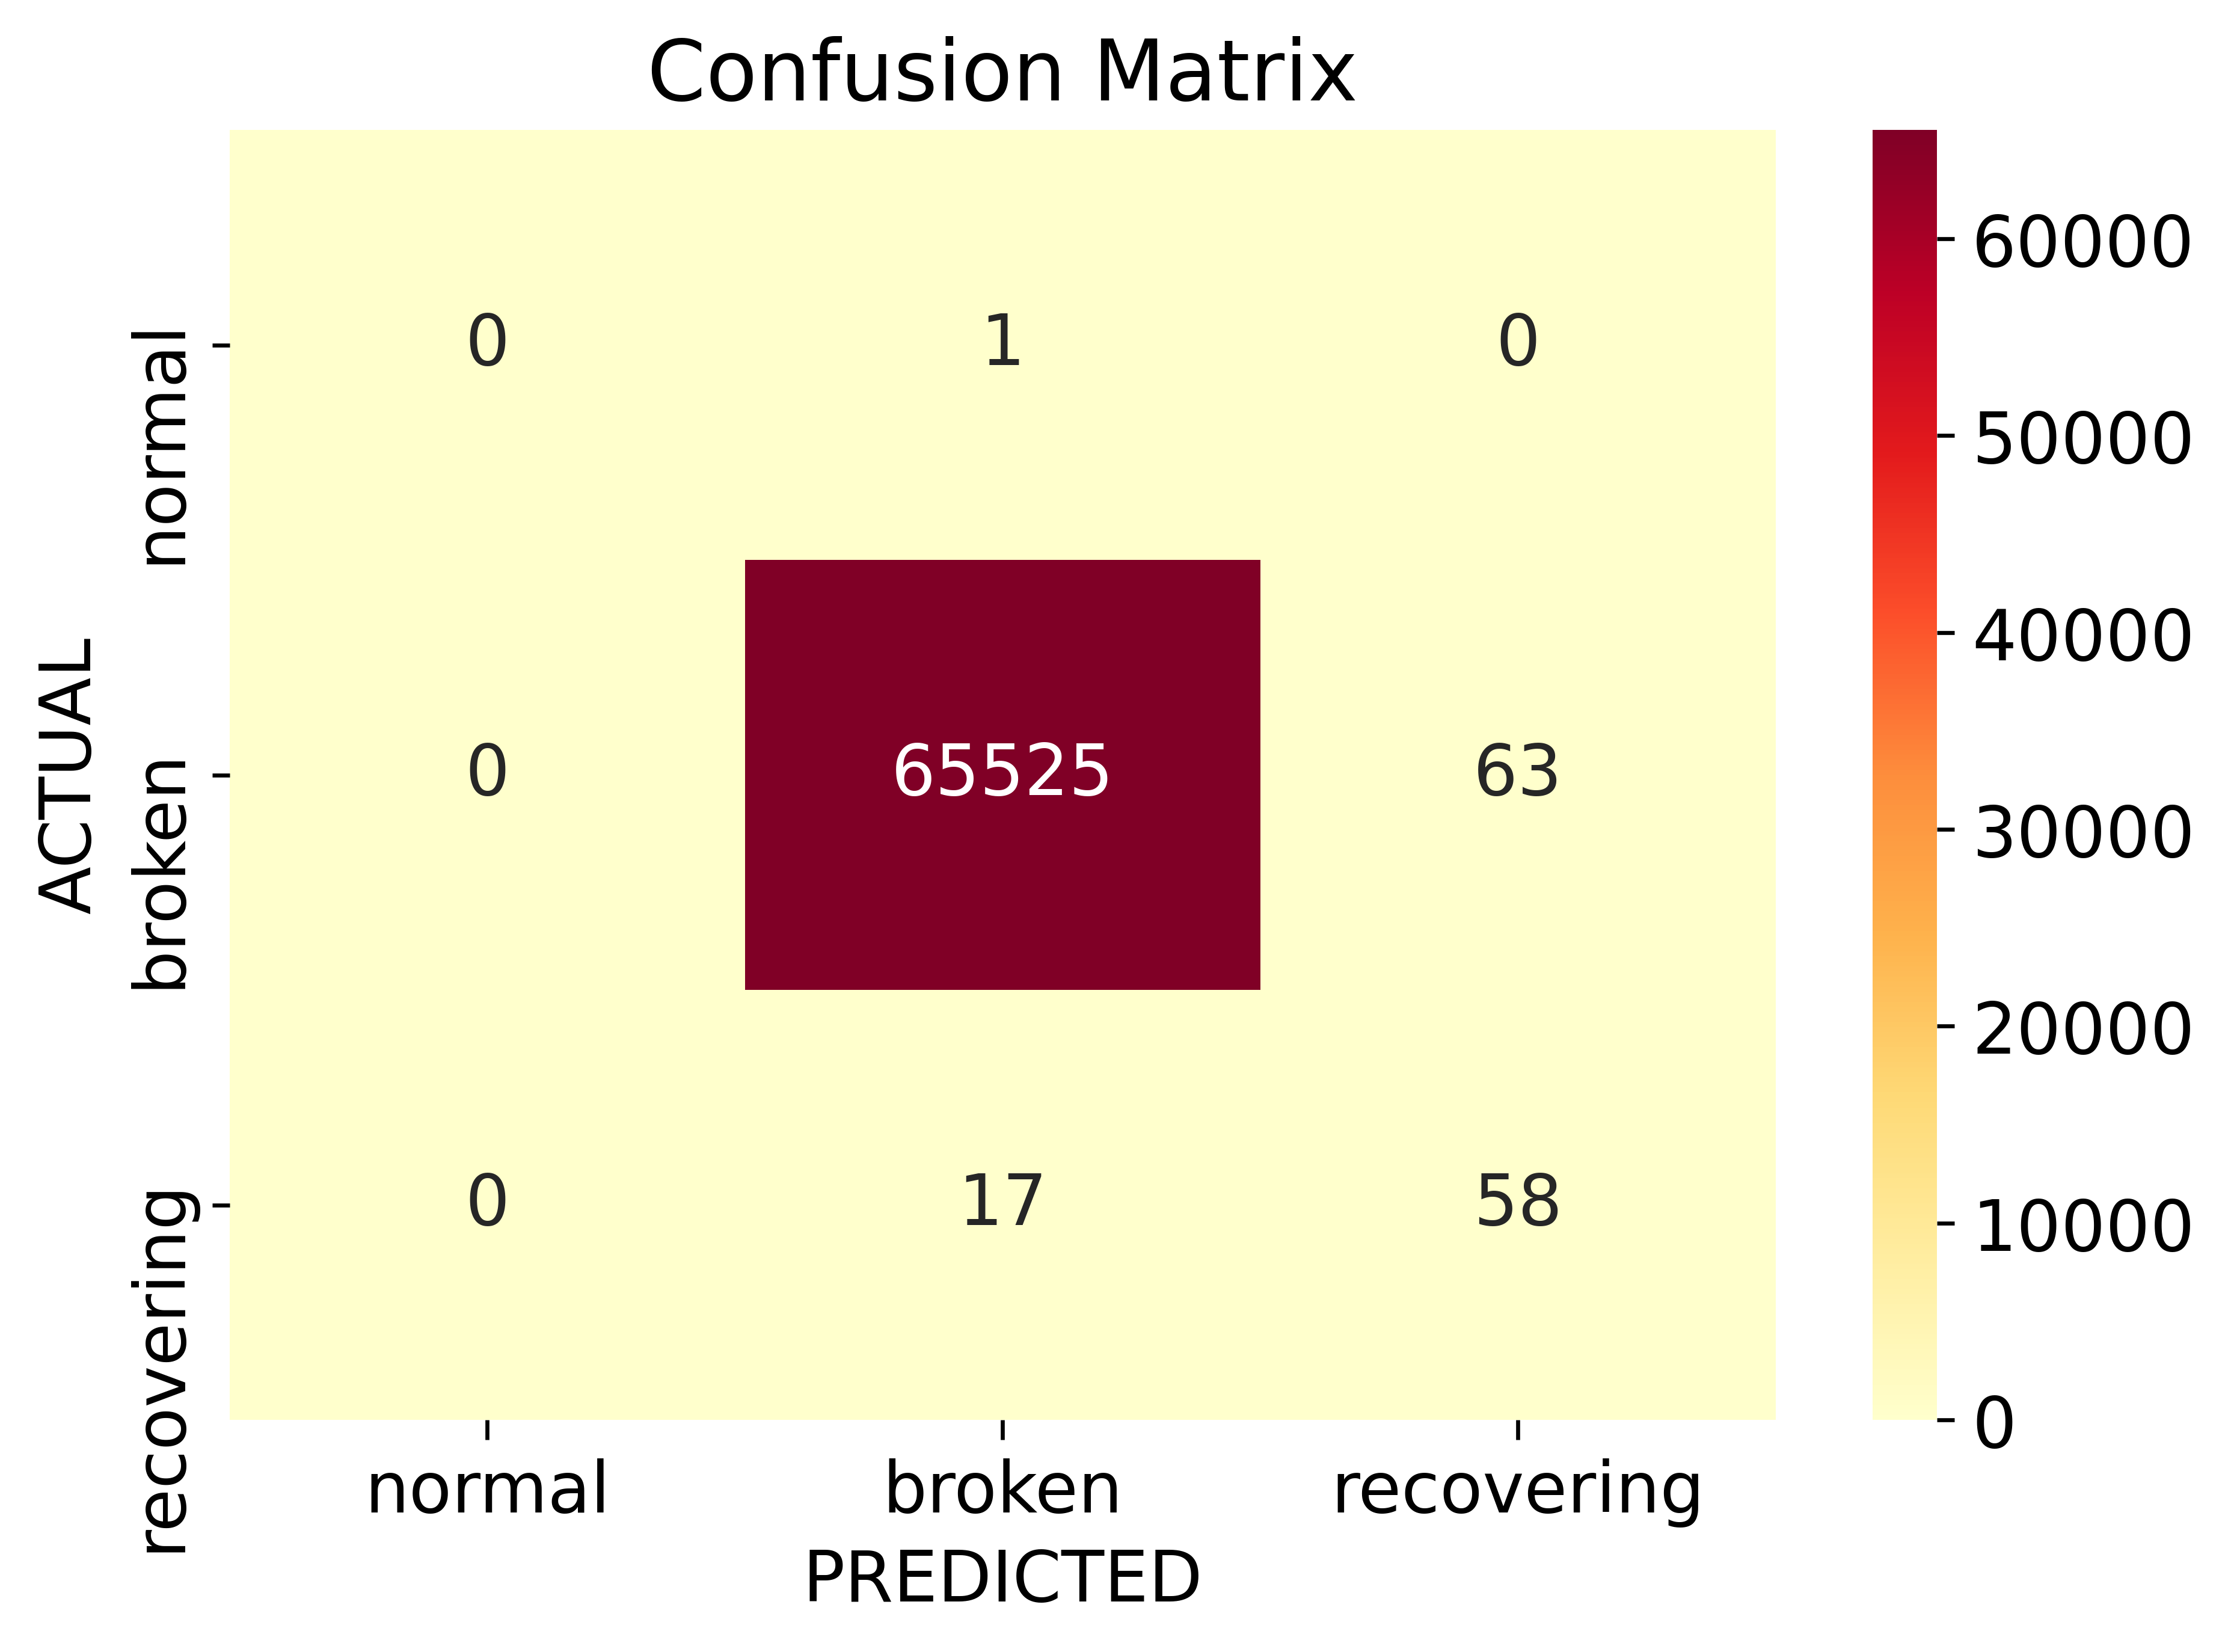


=======================================> PLOTS <=========================================


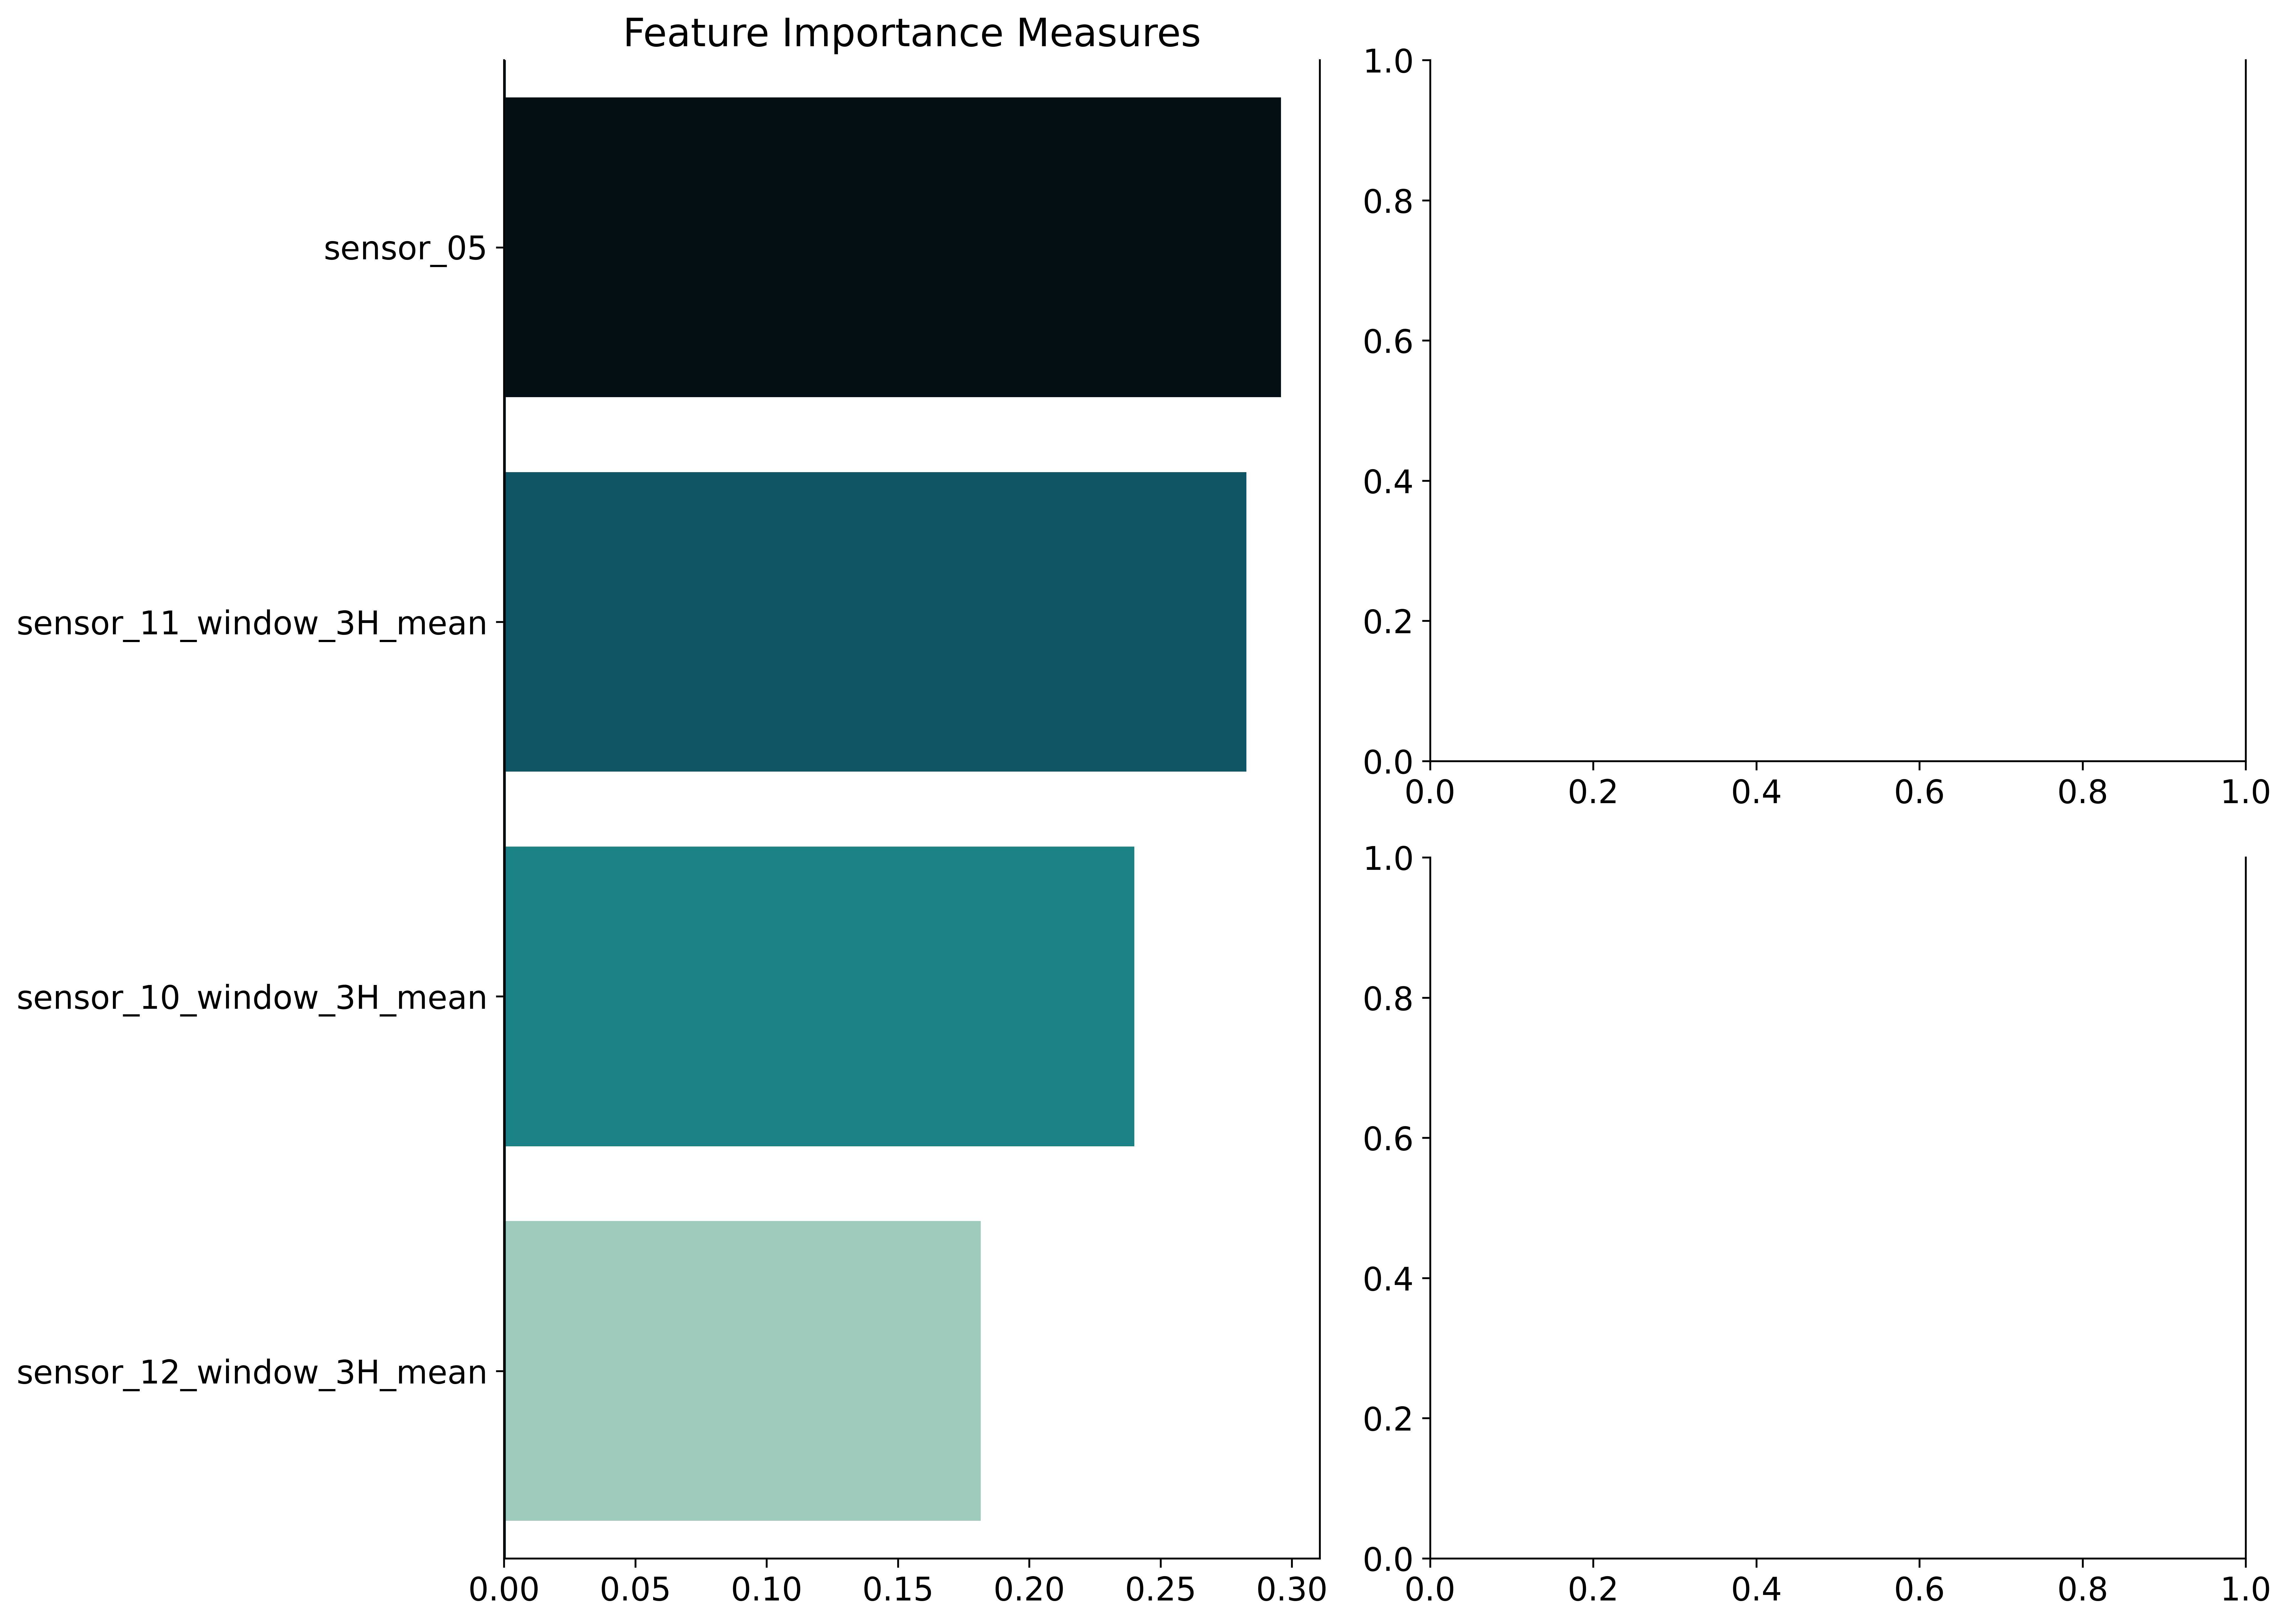

In [64]:
random_forest = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                                       max_depth=9, 
                                    #    max_depth=8, 
                                       max_features=0.2,
                                       n_estimators=100,
                                       n_jobs=-1, random_state=rng)

random_forest, random_forest_report = report(random_forest, X_train, y_train,
                                             X_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

In [65]:
report_list = [
    random_forest_report
]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

In [66]:
compare_table = compare_models(y_test, clf_reports=report_list,
# compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)
compare_table.sort_values(by=['Test f1_score', 'Overfitting'], ascending=[False, False])

,Train f1_score,Test f1_score,Overfitting,Train Accuracy,Test Accuracy,Test ROC-AUC
RandomForestClassifier,0.99794,0.998902,False,0.997931,0.998766,0.936051
